In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('./../input/spaceship-titanic/train.csv')
test=pd.read_csv('./../input/spaceship-titanic/test.csv')
test1=test.copy()
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## **Finding the Info about Data**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## **Finding the Unique Values in each Column** 

In [6]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

## **Finding Null Values in each Column**

In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## **Drop some useless columns**

In [8]:
train=train.drop(columns=['PassengerId','Name'], axis=1)
test=test.drop(columns=['PassengerId','Name'], axis=1)
# test
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## **Unique Values in a particular column**

In [9]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [10]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


## **Heatmap**

<AxesSubplot:>

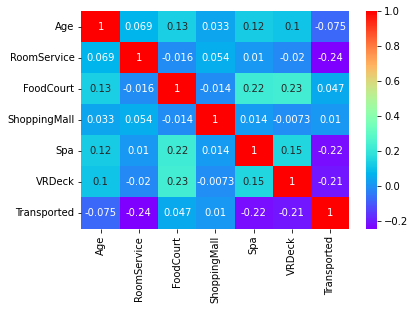

In [11]:
import seaborn as sns
sns.heatmap(train.corr(),cmap='rainbow',annot=True)

## **Countplot**

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

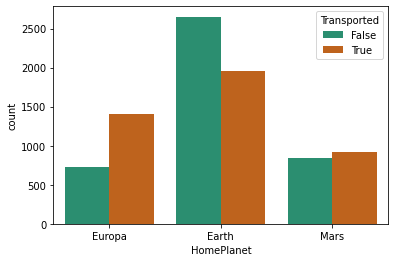

In [12]:
sns.countplot(x='HomePlanet',hue="Transported",data=train,palette = "Dark2")

## **Seperate Feature w.r.t Datatypes**

In [13]:
num_train = train.select_dtypes(include='number')
cat_train = train.select_dtypes(exclude='number')
# num_train
cat_train

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,False,False
1,Earth,False,F/0/S,TRAPPIST-1e,False,True
2,Europa,False,A/0/S,TRAPPIST-1e,True,False
3,Europa,False,A/0/S,TRAPPIST-1e,False,False
4,Earth,False,F/1/S,TRAPPIST-1e,False,True
...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,True,False
8689,Earth,True,G/1499/S,PSO J318.5-22,False,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,False,True
8691,Europa,False,E/608/S,55 Cancri e,False,False


In [14]:
num_test = test.select_dtypes(include='number')
cat_test = test.select_dtypes(exclude='number')
num_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


## **Encoding**

In [15]:
# Label Encoding - label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_train:
    train[col]=le.fit_transform(train[col])
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [16]:
for col in cat_test:
    test[col]=le.fit_transform(test[col])
test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2679,2,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,0,0,3265,2,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,2,1,602,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,603,3,NaN,0,0.0,2680.0,0.0,0.0,523.0


## **Finding the following Features (to be treated seperately later)**
* Continuous Features
* Discreet Features


In [17]:
con_train =[col for col in num_train if train[col].nunique()>25]
dis_train =[col for col in num_train if train[col].nunique()<25]
con_train

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [18]:
con_test =[col for col in num_test if test[col].nunique()>25]
dis_test =[col for col in num_test if test[col].nunique()<25]
con_test

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

## **Imputing**

Missing values are one of the most common problems you can encounter when you try to prepareyour data for machine learning. The reason for the missing values might be human errors,interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

In [19]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')  # Will replace MISSING NUMERIC values with MEAN
# csi = SimpleImputer(strategy='most_frequent')  # Will replace MISSING CATEGORICAL values with MOST FREQUENT value

train=pd.DataFrame(imp.fit_transform(train))

train

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,149.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2184.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2186.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,146.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,0.0,1.0,5280.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,5285.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,1.0,0.0,2131.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0


In [20]:
test = pd.DataFrame(imp.fit_transform(test))
test

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,2784.0,2.0,27.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1867.0,2.0,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,257.0,0.0,31.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,259.0,2.0,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,1940.0,2.0,20.000000,0.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,1.0,2679.0,2.0,34.000000,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.0,0.0,3265.0,2.0,42.000000,0.0,0.0,847.0,17.0,10.0,144.0
4274,2.0,1.0,602.0,0.0,28.658146,0.0,0.0,0.0,0.0,0.0,0.0
4275,1.0,0.0,603.0,3.0,28.658146,0.0,0.0,2680.0,0.0,0.0,523.0


## **Standardizing - Discrete Values**

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).


In [21]:
# RobustScaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

for col in dis_train:
    train[col]= rs.fit_transform(train[col])
train

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,149.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2184.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2186.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,146.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,0.0,1.0,5280.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,5285.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,1.0,0.0,2131.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0


In [22]:
for col in dis_test:
    test[col]= rs.fit_transform(test[col])
test

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,2784.0,2.0,27.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1867.0,2.0,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,257.0,0.0,31.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,259.0,2.0,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,1940.0,2.0,20.000000,0.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,1.0,2679.0,2.0,34.000000,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.0,0.0,3265.0,2.0,42.000000,0.0,0.0,847.0,17.0,10.0,144.0
4274,2.0,1.0,602.0,0.0,28.658146,0.0,0.0,0.0,0.0,0.0,0.0
4275,1.0,0.0,603.0,3.0,28.658146,0.0,0.0,2680.0,0.0,0.0,523.0


## **Removing Outliers**

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88ad5569d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88ad5620d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f88ad556090>,
 'medians': [<matplotlib.lines.Line2D at 0x7f88ad562710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88ad562a50>,
 'means': []}

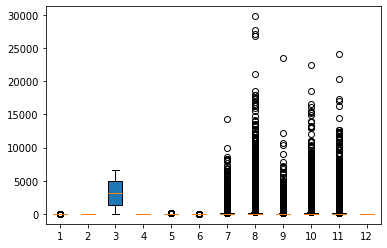

In [23]:
plt.boxplot(train,vert=True,patch_artist=True)

In [24]:
# Using Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.3)

out = iso.fit_predict(train)

# select all rows that are not outliers
train[out != -1]
train

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,149.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2184.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2186.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,146.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,0.0,1.0,5280.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,5285.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,1.0,0.0,2131.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0


In [25]:
out = iso.fit_predict(test)

# select all rows that are not outliers
test[out != -1]
test

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,2784.0,2.0,27.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1867.0,2.0,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,257.0,0.0,31.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,259.0,2.0,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,1940.0,2.0,20.000000,0.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,1.0,2679.0,2.0,34.000000,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.0,0.0,3265.0,2.0,42.000000,0.0,0.0,847.0,17.0,10.0,144.0
4274,2.0,1.0,602.0,0.0,28.658146,0.0,0.0,0.0,0.0,0.0,0.0
4275,1.0,0.0,603.0,3.0,28.658146,0.0,0.0,2680.0,0.0,0.0,523.0


## **Splitting x & y**

In [26]:
y=train.iloc[:,-1]
X=train.iloc[::,:-1]
# y
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,149.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2184.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0
2,1.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0
3,1.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,0.0,0.0,2186.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,146.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,1.0,5280.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,5285.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0
8691,1.0,0.0,2131.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0


## **Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train

,0,1,2,3,4,5,6,7,8,9,10
2428,2.0,1.0,3897.0,2.0,24.00000,0.0,0.0,0.000000,0.0,0.0,0.0
2937,0.0,0.0,3994.0,2.0,43.00000,0.0,0.0,788.000000,0.0,0.0,1191.0
7012,2.0,0.0,1983.0,2.0,71.00000,0.0,1243.0,0.000000,5.0,16.0,34.0
4046,2.0,1.0,4283.0,2.0,24.00000,0.0,0.0,0.000000,0.0,0.0,0.0
1914,1.0,0.0,990.0,0.0,39.00000,0.0,0.0,458.077203,0.0,1528.0,1119.0
...,...,...,...,...,...,...,...,...,...,...,...
6970,1.0,2.0,866.0,2.0,16.00000,0.0,0.0,1417.000000,3.0,27.0,186.0
2980,0.0,0.0,5838.0,2.0,28.82793,0.0,16.0,0.000000,799.0,0.0,37.0
3131,0.0,0.0,4116.0,1.0,53.00000,0.0,2.0,18.000000,705.0,0.0,1.0
4998,0.0,1.0,6351.0,2.0,20.00000,0.0,0.0,0.000000,0.0,0.0,0.0


## **Train**

In [28]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=20,oob_score=True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, oob_score=True)

## **Predict**

In [29]:
predict= model.predict(X_test)
predict

array([0., 1., 0., ..., 1., 0., 1.])

## **Score**

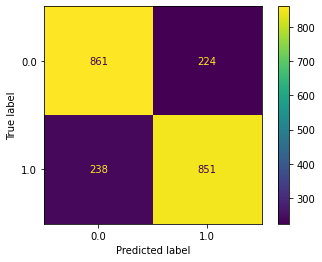

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, predict)

0.7865064695009243

In [32]:
sub=np.where(model.predict(test)==0.0,False,True) 
    
submission=pd.DataFrame({'PassengerId': test1.PassengerId,
                         'Transported' : sub
                        })
submission.to_csv('submission.csv', index=False)

## **Suggestions:-**
* Kaggle - https://www.kaggle.com/pythonkumar
* GitHub - https://github.com/KumarPython​
* Twitter - https://twitter.com/KumarPython
* LinkedIn - https://www.linkedin.com/in/kumarpython/
